In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import dill
from decimal import Decimal
data_path=  'D:/DAMP/Research/dilldata/CRNN_train_1.dill'

data = dill.load(open(data_path, 'rb')) #list
print(len(data))

for item in data:
    wav = item['audio'][0]
    sr = item['audio'][1]
    wav = torch.tensor(wav)
    wav = wav[None, :].to(torch.float32)
    item['w2v_2'] = wav2vec_2(wav,sr)
data

1600


[{'audio': [array([-0.00064087, -0.01715088, -0.00411987, ..., -0.00140381,
          -0.00180054, -0.0015564 ]),
   16000],
  'ratings': [0.792],
  'w2v_2': tensor([[[-0.0180,  0.1828,  0.3317,  ...,  0.0233,  0.4177, -0.1548],
           [-0.2386,  0.0239,  0.0776,  ...,  0.1959,  0.4982, -0.4157],
           [-0.1486,  0.1979,  0.5377,  ...,  0.0278,  0.2467,  0.0461],
           ...,
           [-0.1354,  0.0711,  0.3761,  ...,  0.1542,  0.2832, -0.3495],
           [-0.0869,  0.2263,  0.5991,  ...,  0.0585,  0.2656,  0.0744],
           [-0.0873, -0.0330,  0.0848,  ...,  0.1558,  0.2510, -0.3027]]])},
 {'audio': [array([ 3.05175781e-05,  9.15527344e-05,  5.49316406e-04, ...,
          -2.56347656e-03,  1.50451660e-02,  5.00488281e-03]),
   16000],
  'ratings': [0.792],
  'w2v_2': tensor([[[-0.0032,  0.1532,  0.2913,  ..., -0.2420,  0.0799, -0.2850],
           [ 0.0568,  0.1715,  0.3177,  ..., -0.2274,  0.0864, -0.3570],
           [ 0.0299,  0.1836,  0.3548,  ..., -0.2507,  0.108

In [1]:
data

NameError: name 'data' is not defined

In [96]:
train_dill = open('D:/DAMP/Research/dilldata/w2v_CRNN_train_1.dill', 'wb') 
dill.dump(data, train_dill)

In [147]:
tnse_embeddings_wav2vec_2 = []
label = []
label_str = []
import numpy as np


def features(feature_sequence,dim):
# Create some random MFCC shaped features as a sequence of 10 values
   # feature_sequence = np.random.random((10, dim))
    # Get the standard deviation
    stddev_features = np.std(feature_sequence, axis=0)
    # Get the mean
   #### mean_features = np.mean(feature_sequence, axis=0)
    # Get the average difference of the features
    # average_difference_features = np.zeros((dim,))
    # for i in range(0, len(feature_sequence) - 2, 2):
    #     average_difference_features += feature_sequence[i] - feature_sequence[i+1]
    # average_difference_features /= (len(feature_sequence) // 2)   
    # average_difference_features = np.array(average_difference_features)
    # # Concatenate the features to a single feature vector
    # concat_features_features = np.hstack((stddev_features, mean_features))
    # concat_features_features = np.hstack((concat_features_features, average_difference_features))
    #return concat_features_features
    return stddev_features


# for item in data:
#     rating = item['ratings'][0]
#     if rating >= 0.6 or rating < -0.6:
#         item = item['w2v_2'].numpy()
#         item = np.squeeze(item, axis=0)
#         item = features(item,dim=768)
#         tnse_embeddings_wav2vec_2.append(item)
        
for item in data:
    rating = item['ratings'][0]

    item = item['w2v_2'].numpy()
    item = np.squeeze(item, axis=0)
    item = features(item,dim=768)
    tnse_embeddings_wav2vec_2.append(item) 
    print(item.shape)


count = [0,0,0,0,0]
# for item in data:
#     rating = item['ratings'][0]
#     if rating >= 0.6: 
#         rating = 5
#         rating_str = 'best singings'
#         count[4]+=1
#         label.append(rating)
#         label_str.append(rating_str)
#     elif rating < -0.6: 
#         rating = 1
#         rating_str = 'worst singings'
#         count[0]+=1
#         label.append(rating)
#         label_str.append(rating_str)
for item in data:
    rating = item['ratings'][0]
    if rating >= 0.6: 
        rating = 5
        rating_str = 'best singings'
        count[4]+=1

    elif rating >= 0.2: 
        rating = 4
        count[3]+=1
    elif rating >= -0.2: 
        rating = 3
        count[2]+=1
    elif rating >= -0.6: 
        rating = 2
        count[1]+=1
    elif rating < -0.6: 
        rating = 1
        rating_str = 'worst singings'
        count[0]+=1
    label.append(rating)

count



(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)
(768,)

[190, 375, 455, 425, 155]

In [148]:
print(len(label))
len(tnse_embeddings_wav2vec_2)

1600


1600

In [149]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

import pandas
def get_scaled_tsne_embeddings(features, perplexity, iteration):
    embedding = TSNE(n_components=2,
                     perplexity=perplexity,
                     n_iter=iteration).fit_transform(features)
    scaler = MinMaxScaler()
    scaler.fit(embedding)
    return scaler.transform(embedding) 

all_json = dict()
tnse_embeddings_mfccs = []
perplexities = [2, 5, 30, 50, 100]
iterations = [250, 500, 1000, 2000, 5000]

for i,perplexity in enumerate(perplexities):
    for j, iteration in enumerate(iterations):
        tsne_mfccs = get_scaled_tsne_embeddings(tnse_embeddings_wav2vec_2,
                                                perplexity,
                                                iteration)
        tnse_embeddings_mfccs.append(tsne_mfccs)

        
        mfcc_key = 'tsnemfcc{}{}'.format(i, j) 
        wavenet_key = 'tsnewavenet{}{}'.format(i, j) 
    


In [ ]:
for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 8 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 8 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 8 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 8 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        

c:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


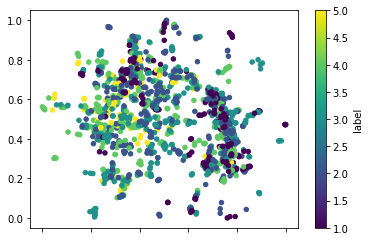

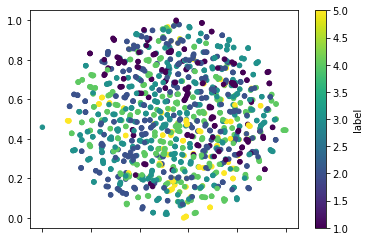

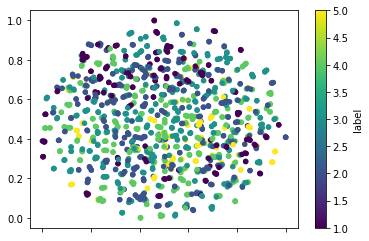

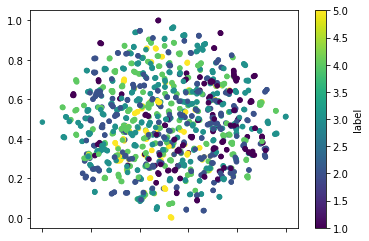

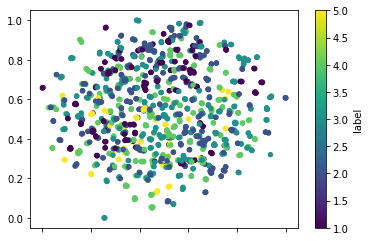

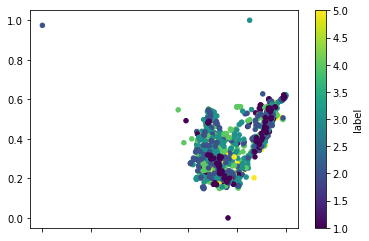

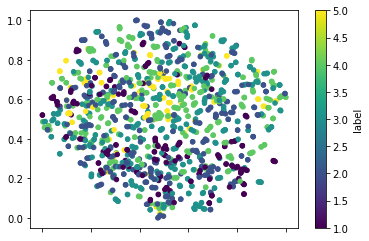

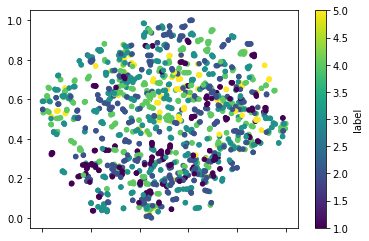

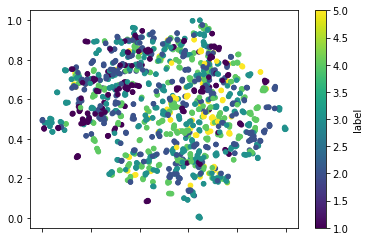

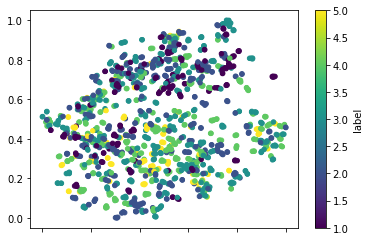

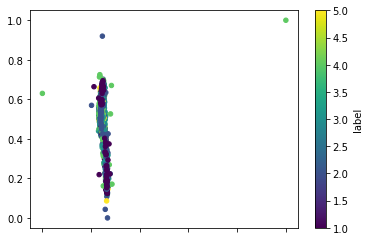

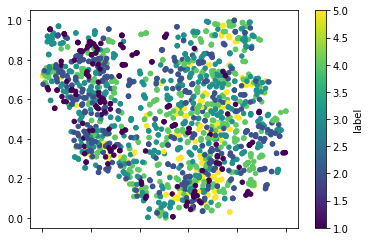

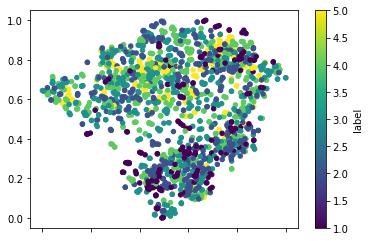

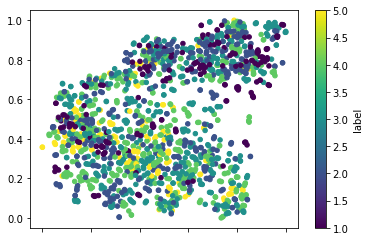

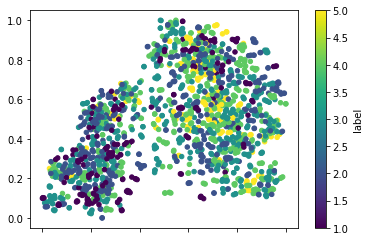

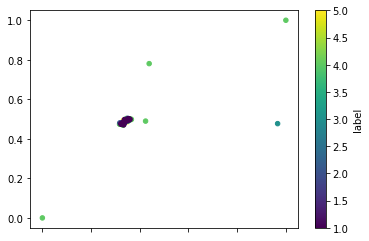

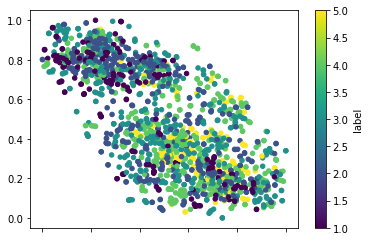

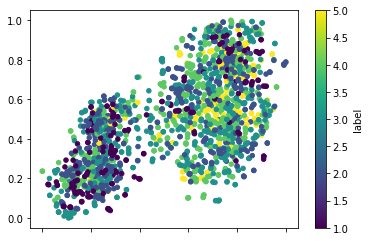

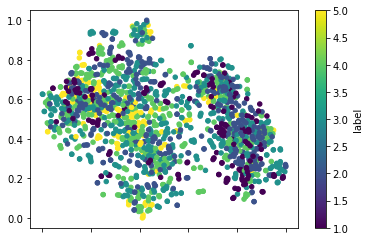

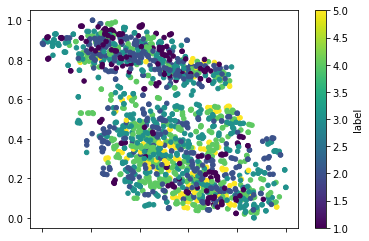

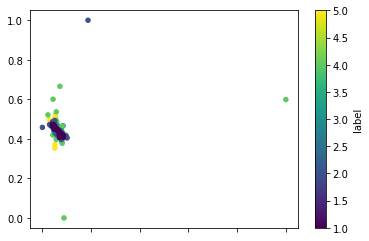

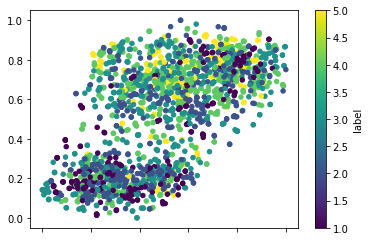

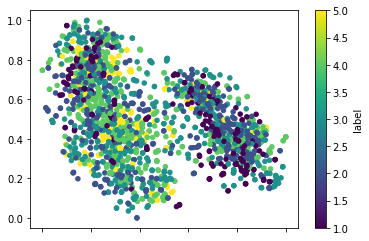

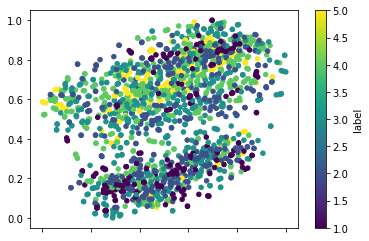

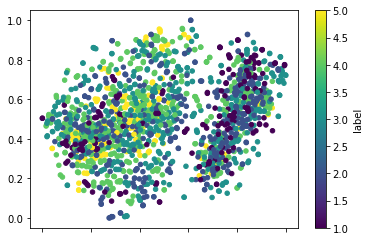

In [150]:
for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 5 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        

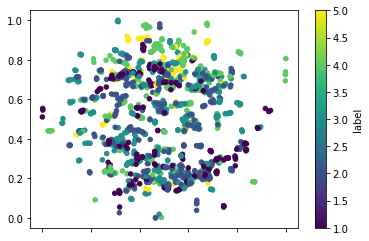

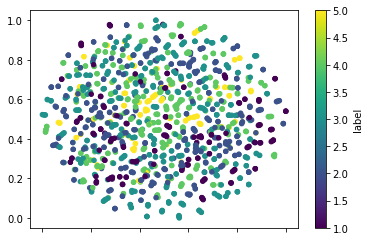

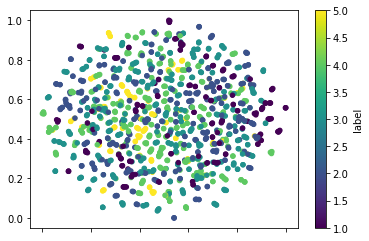

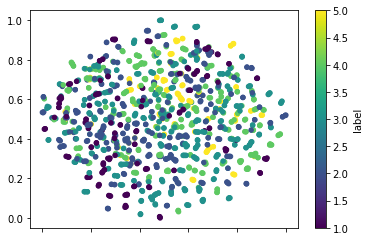

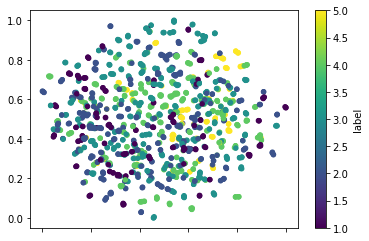

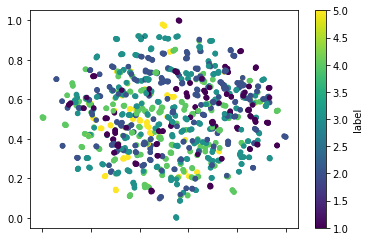

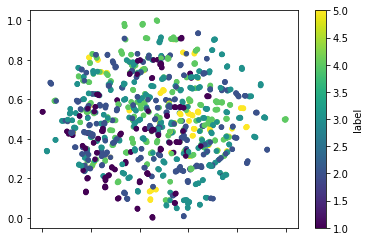

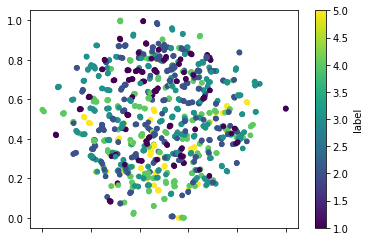

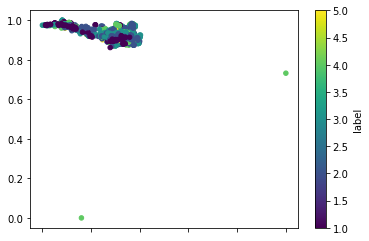

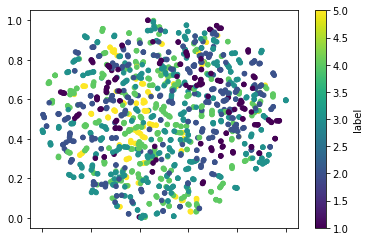

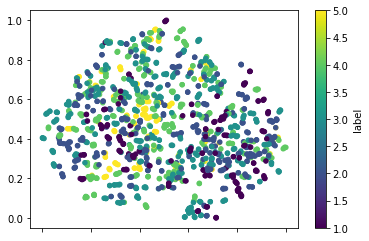

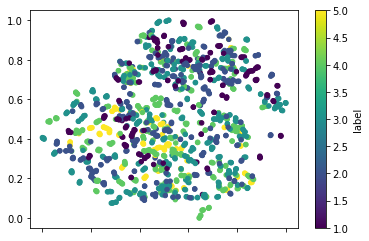

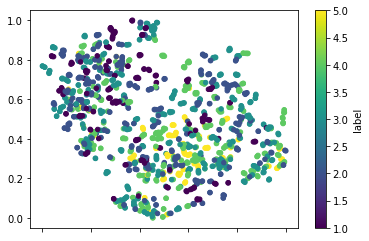

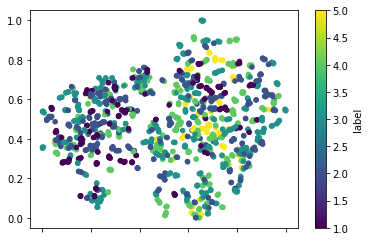

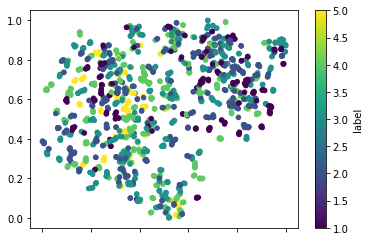

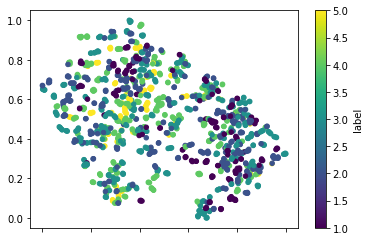

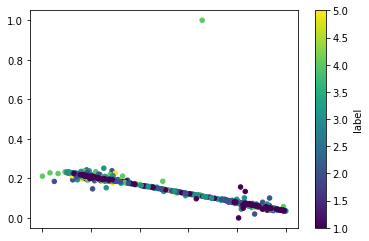

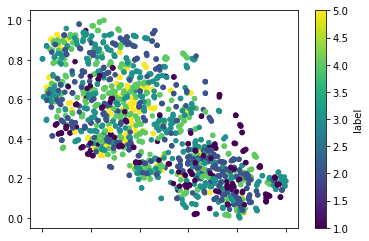

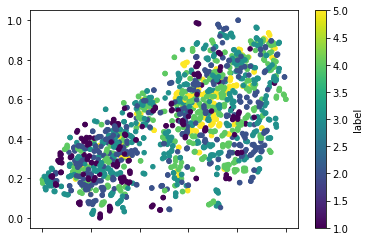

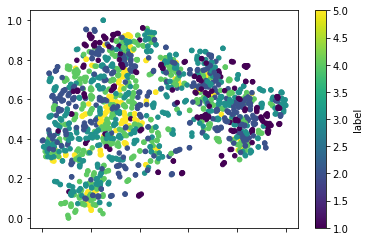

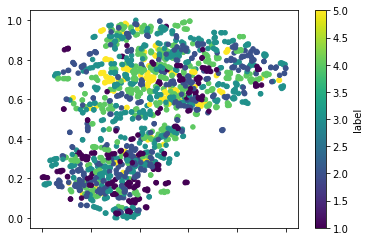

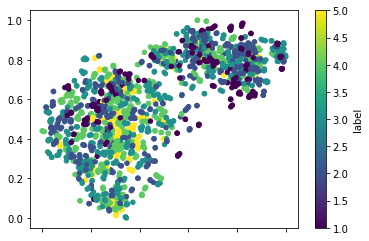

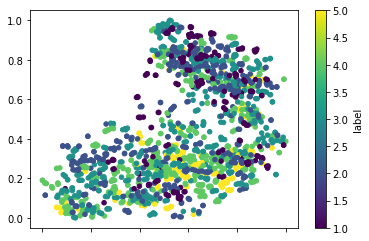

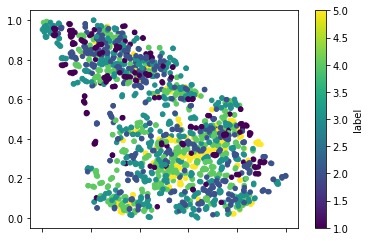

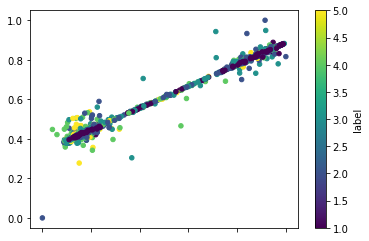

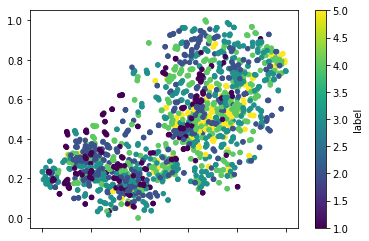

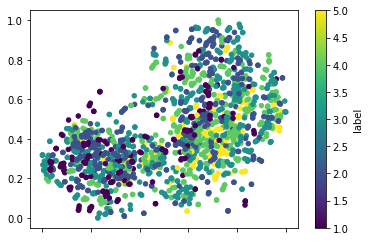

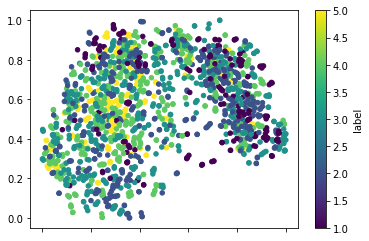

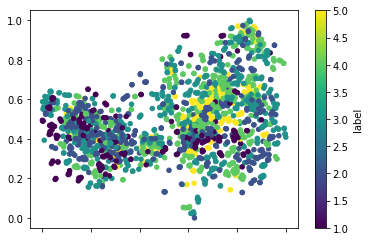

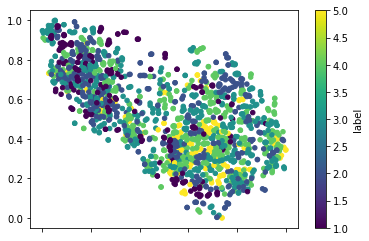

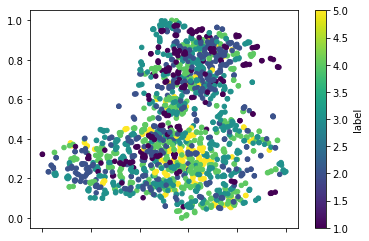

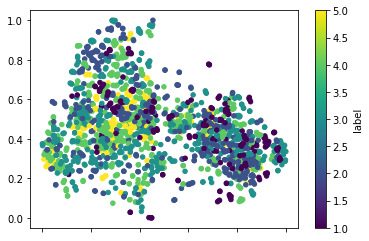

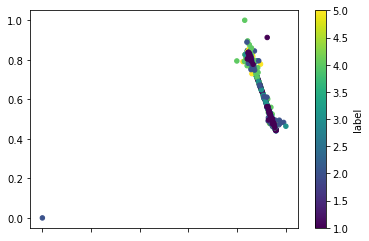

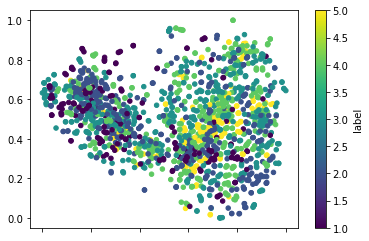

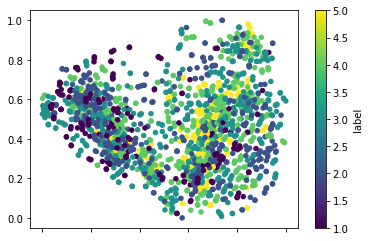

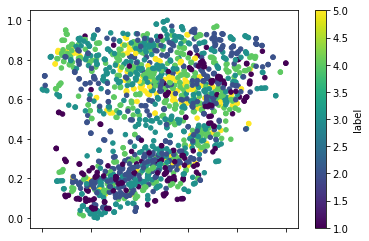

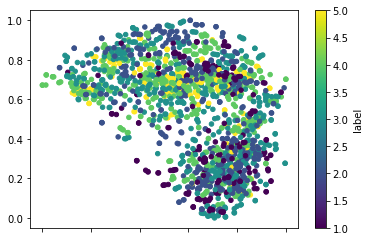

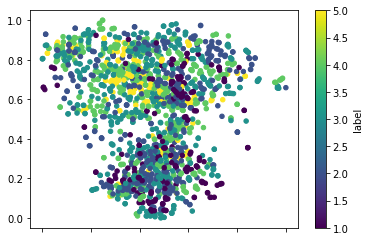

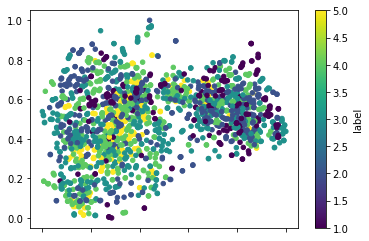

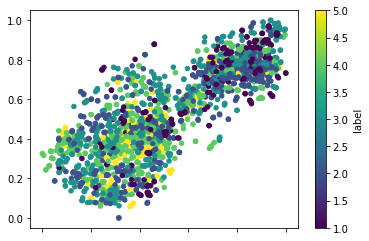

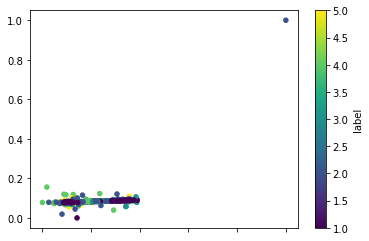

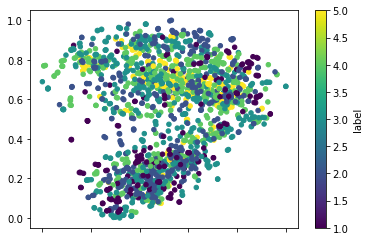

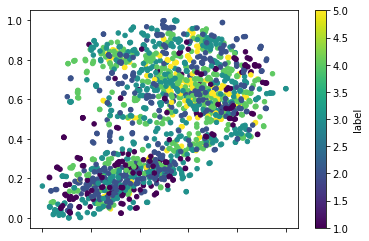

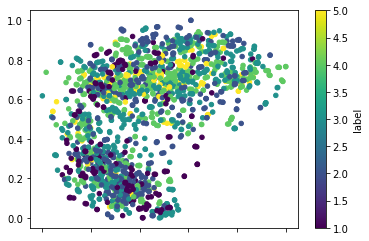

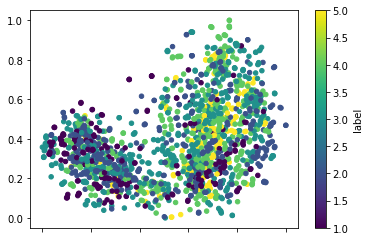

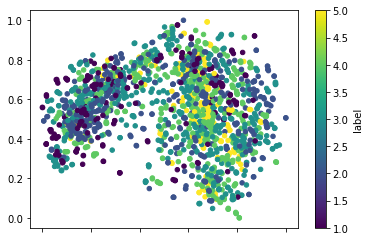

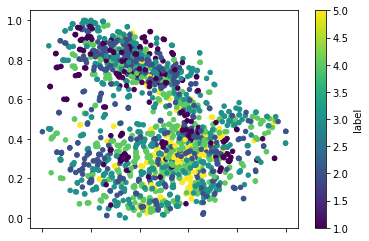

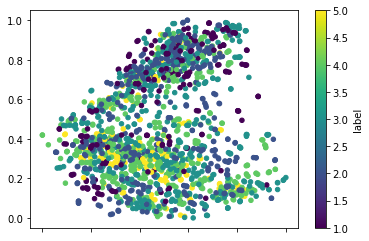

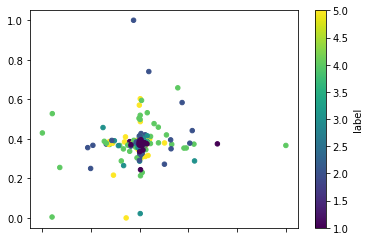

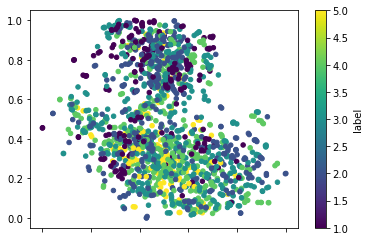

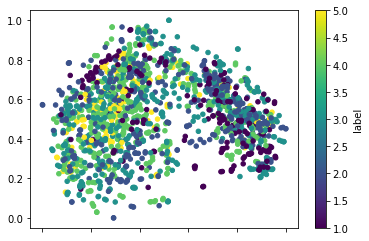

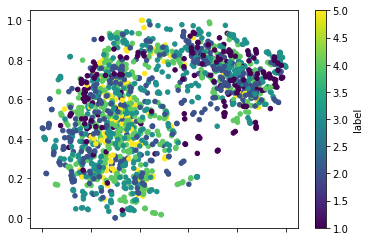

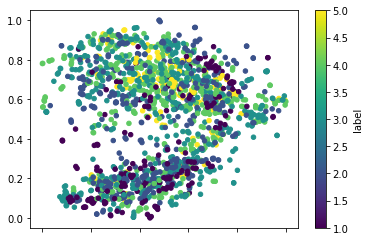

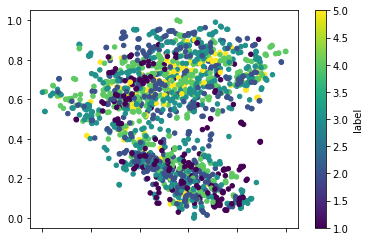

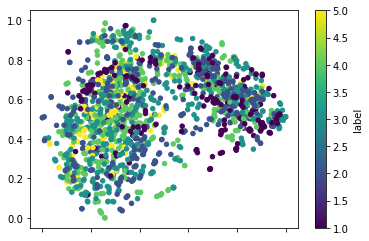

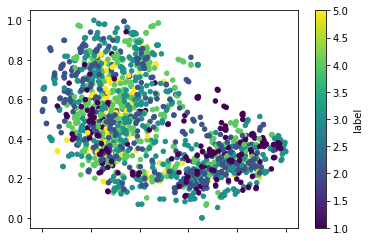

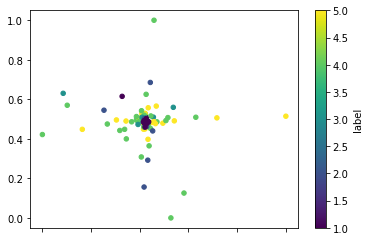

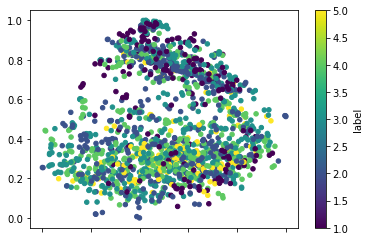

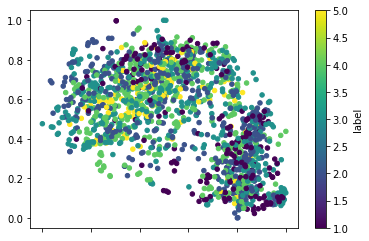

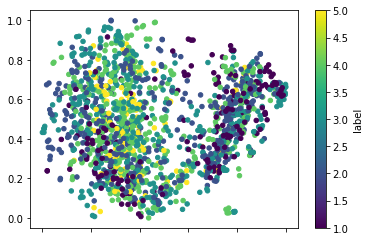

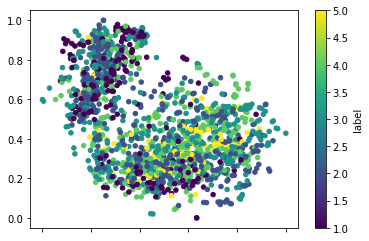

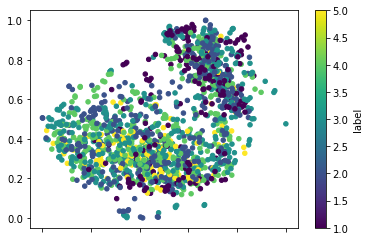

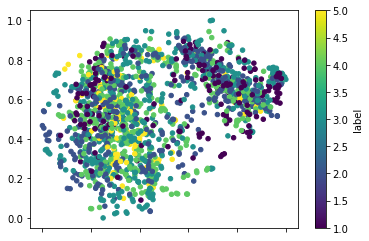

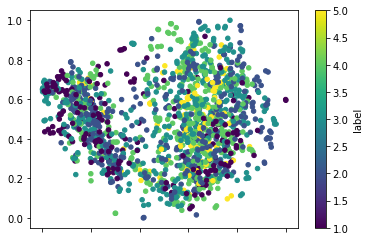

In [146]:
for i in range(len(perplexities)):
    for j in range(len(iterations )):
        current_plot = i * 8 + j
        

        Feature_1 = tnse_embeddings_mfccs[current_plot].T[0]
        Feature_2 = tnse_embeddings_mfccs[current_plot].T[1]

        dataframe = {"Feature_1":Feature_1,
                "Feature_2":Feature_2,
                'label':label
                }
        df = pandas.DataFrame(dataframe)
        # colors = {'best singings':'tab:red', 'worst singings':'tab:green'}
        # fig, ax = plt.subplots(figsize=(6, 6))
        # ax.scatter(df['Feature_1'], df['Feature_2'], c=df['label'].map(colors))
        # plt.show()

        df.plot(x="Feature_1", y="Feature_2",xlabel='',c='label', ylabel='',kind='scatter', colormap='viridis')
        

In [ ]:
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1)

In [ ]:
import os
import torchaudio
import IPython
import requests
import torch
import torchaudio

def wav2vec_2(wav,sr):
    torch.random.manual_seed(123)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bundle = torchaudio.pipelines.WAV2VEC2_BASE
    model = bundle.get_model().to(device)

    #SPEECH_FILE   = "D:/DAMP/SingEval_DAMPcurated/audio_snippets_1/_cups_pitch_perfect/68307032_39376090.wav"
    #SPEECH_FILE   = "D:/DAMP/SingEval_DAMPcurated/audio_snippets_1/_let_it_go/70366197_41259492.wav"
    bundle = torchaudio.pipelines.WAV2VEC2_BASE
    # print("Sample Rate:", bundle.sample_rate)
    # print(model.__class__)
    waveform, sample_rate =wav ,sr
    waveform = waveform.to(device)

    if sample_rate != bundle.sample_rate:
        waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
    with torch.inference_mode():
        features, _ = model(waveform)
    return features

In [ ]:
SPEECH_FILE   = "D:/DAMP/SingEval_DAMPcurated/audio_snippets_1/_cups_pitch_perfect/68307032_39376090.wav"



waveform, sample_rate = torchaudio.load(SPEECH_FILE)
print(type(waveform))
print(waveform.shape)
print(type(sample_rate))